- Implement k-means algorithm by Numpy.

- Use "Wine dataset" below and choose 2 features according to your preference. Run the k-means algorithm built in the first question. Try 3 different numbers of cluster and visualize the clustering result to see if there is any difference.

- Read and understand how to choose the optimal number of cluster (https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/). Draw the elbow for the whole "Wine" dataset (all features).

- Read the limitation of k-means (https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages), find at least three examples that k-means doesn't work.

- [Optional] You learnt about what is k-means++. Explain how k-means++ works AND implement k-means++ algo as you wish.

****

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Problem 1: Implement K-means algorithm from scratch

### Iterative optimization 
**1. Ininitallize cluster centers (e.g. randomly)**

**2. Repeat until convergence:**
- Update cluster labels ($r_i$) : Assign points to the nearest cluster center.
- Update cluster centers - centroids ($\mu_i$): Set center to the mean of each cluster.

In [7]:
class KMeans:
    
    def __init__(self, K=5, max_iters = 100, plot_steps = False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)] 

        # the centers (mean vectors) for each cluster
        self.centroids = []

    
    def _create_clusters(self, centroids):
        '''Assign the samples to the closet centroids'''
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closet_cetroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        
        return clusters

    
    def _closet_cetroid(self, sample, centroids):
        # euclide distance of the current sample to each centroid
        distances = [self.__euclide_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        
        return closest_idx

    
    def __euclide_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))
    
    
    def _get_centroids(self, clusters):
        '''Assign mean value of clusters to centroids'''
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        
        return centroids

    
    def _is_converged(self, centroids_old, centroids_new):
        '''
        Check distances between old and new centroids for all centroids
        If no more distances, return True
          '''
       
        distances = [self.__euclide_distance(centroids_old[i], centroids_new[i])\
                     for i in range(self.K)]
        
        return sum(distances) == 0


    def _get_cluster_labels(self, clusters):
        '''Each sample will get the label of the cluster it was assigned to'''
        labels = np.empty(self.n_samples)
        for cluster_idx, clusters in enumerate(clusters):
            for sample_idx in clusters:
                labels[sample_idx] = cluster_idx
        
        return labels
    

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialize 
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # optimize clusters
        for _ in range(self.max_iters):
            # assign samples to closets centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            # calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            if self._is_converged(centroids_old, self.centroids):
                    break
            
        if self.plot_steps:
                self.plot()
        
        # classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)
            
    
    def plot(self):
        fig, ax = plt.subplots(figsize = (12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point, marker = 'o',label = f'cluster {i}')
        
        for i,point in enumerate(self.centroids):
            # Draw white circles at cluster centers
            ax.scatter(*point, marker='o', c = 'white',  s = 200, edgecolors='k')
            # Lable clusters
            ax.scatter(*point, marker='$%d$' % i, s = 50, edgecolors='k')
        
        plt.title(f'K-means with {self.K} clusters',size = 15)
        plt.legend()
        plt.show()

    
    def _within_cluster_sum_of_squares(self):
        '''Method to measures the squared average distance 
        of all the points within a cluster to the cluster centroid'''

        clusters = self.clusters
        centroids = self.centroids

        mean_distance_points_clusters = []
        for i, sample in enumerate(clusters):
            mean_distance_in_cluster = np.sum([self.__euclide_distance(point, centroids[i]) for point in sample])
            mean_distance_points_clusters.append(mean_distance_in_cluster) 
        
        return np.mean(mean_distance_points_clusters)


# Problem 2: Wine Dataset

-  Use "Wine dataset" below and choose 2 features according to your preference. Run the k-means algorithm built in the first question. Try 3 different numbers of cluster and visualize the clustering result to see if there is any difference.

- Read and understand how to choose the optimal number of cluster (https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/). Draw the elbow for the whole "Wine" dataset (all features).


In [8]:
# wine = pd.read_csv("...\\K-Mean\wine-clustering.csv")
# wine.head()

In [9]:
wine = pd.read_csv(
    r'D:\NEU\Năm 3\SEMESTER 6\ML 2\GitHub ML\Machine-Learning-1\K-Mean\wine-clustering.csv')
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**Decide 2 features**

In [10]:
X = wine.loc[:,['Alcohol','Hue']].values
X

array([[14.23 ,  1.04 ],
       [13.2  ,  1.05 ],
       [13.16 ,  1.03 ],
       [14.37 ,  0.86 ],
       [13.24 ,  1.04 ],
       [14.2  ,  1.05 ],
       [14.39 ,  1.02 ],
       [14.06 ,  1.06 ],
       [14.83 ,  1.08 ],
       [13.86 ,  1.01 ],
       [14.1  ,  1.25 ],
       [14.12 ,  1.17 ],
       [13.75 ,  1.15 ],
       [14.75 ,  1.25 ],
       [14.38 ,  1.2  ],
       [13.63 ,  1.28 ],
       [14.3  ,  1.07 ],
       [13.83 ,  1.13 ],
       [14.19 ,  1.23 ],
       [13.64 ,  0.96 ],
       [14.06 ,  1.09 ],
       [12.93 ,  1.03 ],
       [13.71 ,  1.11 ],
       [12.85 ,  1.09 ],
       [13.5  ,  1.12 ],
       [13.05 ,  1.13 ],
       [13.39 ,  0.92 ],
       [13.3  ,  1.02 ],
       [13.87 ,  1.25 ],
       [14.02 ,  1.04 ],
       [13.73 ,  1.19 ],
       [13.58 ,  1.09 ],
       [13.68 ,  1.23 ],
       [13.76 ,  1.25 ],
       [13.51 ,  1.1  ],
       [13.48 ,  1.04 ],
       [13.28 ,  1.09 ],
       [13.05 ,  1.12 ],
       [13.07 ,  1.18 ],
       [14.22 ,  0.89 ],


**Dataset Original Visualize**


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


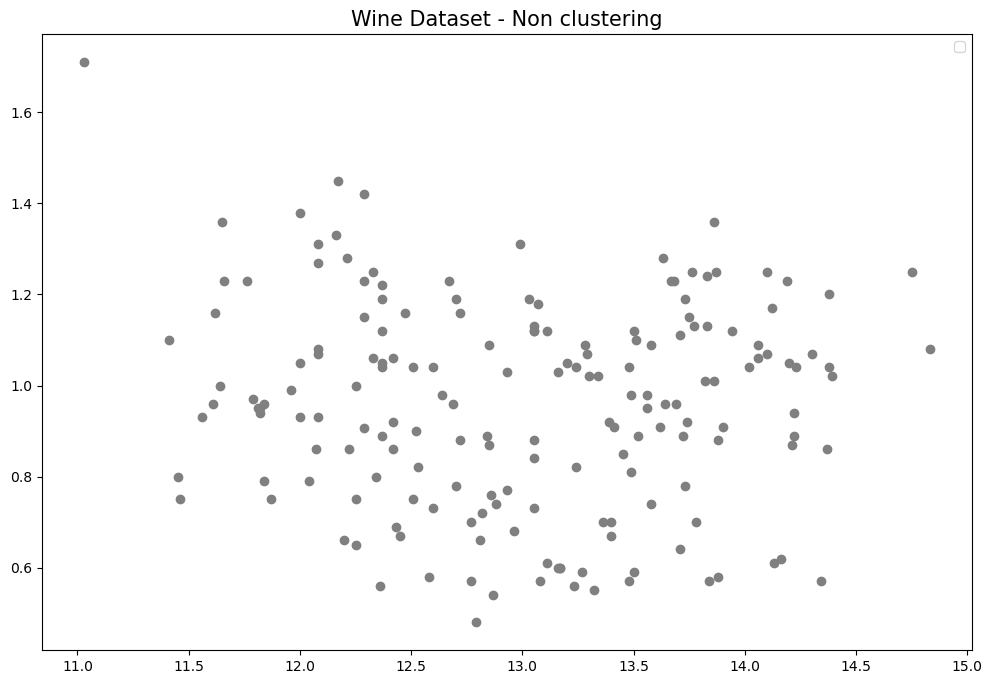

In [16]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.scatter(*X.T, color = 'gray')

plt.title('Wine Dataset - Non clustering', size = 15)
plt.legend()
plt.show()

**K-Means with 2 clusters**

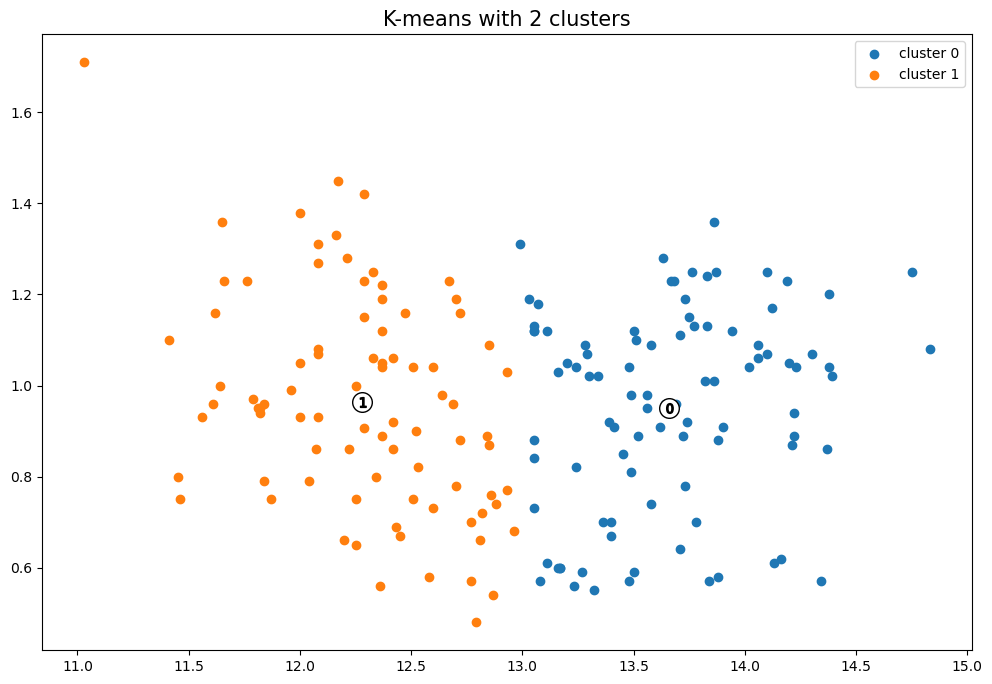

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0.])

In [12]:
kmeans_2 = KMeans(K=2, max_iters=150, plot_steps= True)
kmeans_2.predict(X)

**K-Means with 3 clusters**

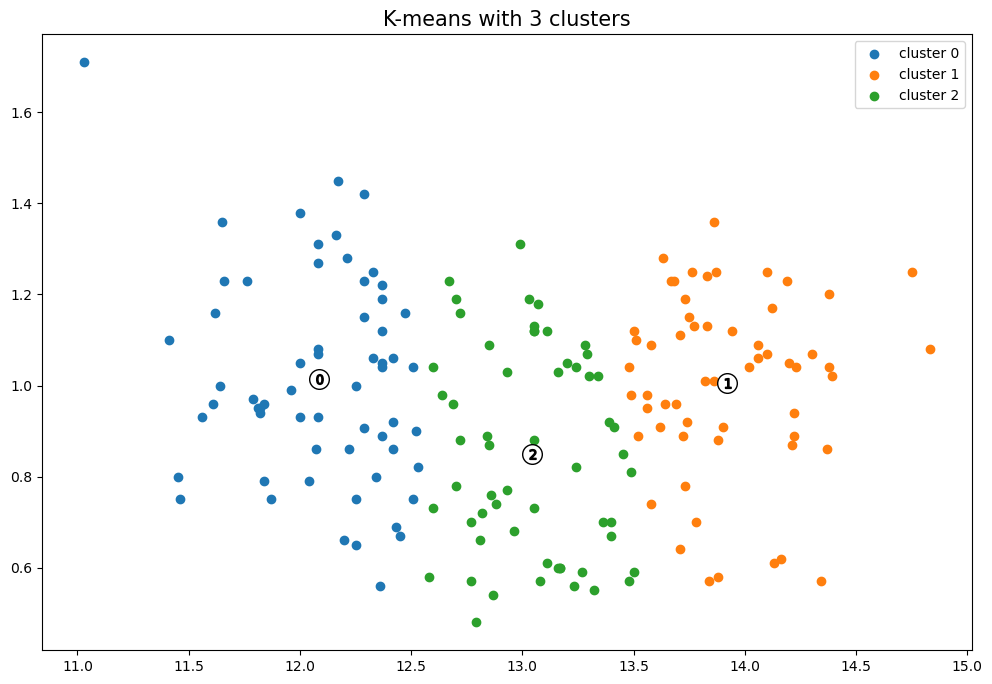

array([1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 2., 1., 0., 0., 2., 1., 0., 0., 0., 2., 0.,
       2., 0., 0., 1., 1., 2., 0., 0., 2., 0., 0., 2., 0., 2., 0., 2., 0.,
       2., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
       0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
       0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 2., 2., 2., 2., 0., 2.,
       0., 0., 2., 2., 2., 2., 1., 1., 0., 2., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 1., 0., 1., 2., 0., 1., 2., 2., 1., 1., 2., 2., 1., 2.,
       0., 2., 1., 1., 2., 2., 2., 1.])

In [13]:
kmeans_3 = KMeans(K=3, max_iters=150, plot_steps=True)
kmeans_3.predict(X)

**K-Means with 5 clusters**

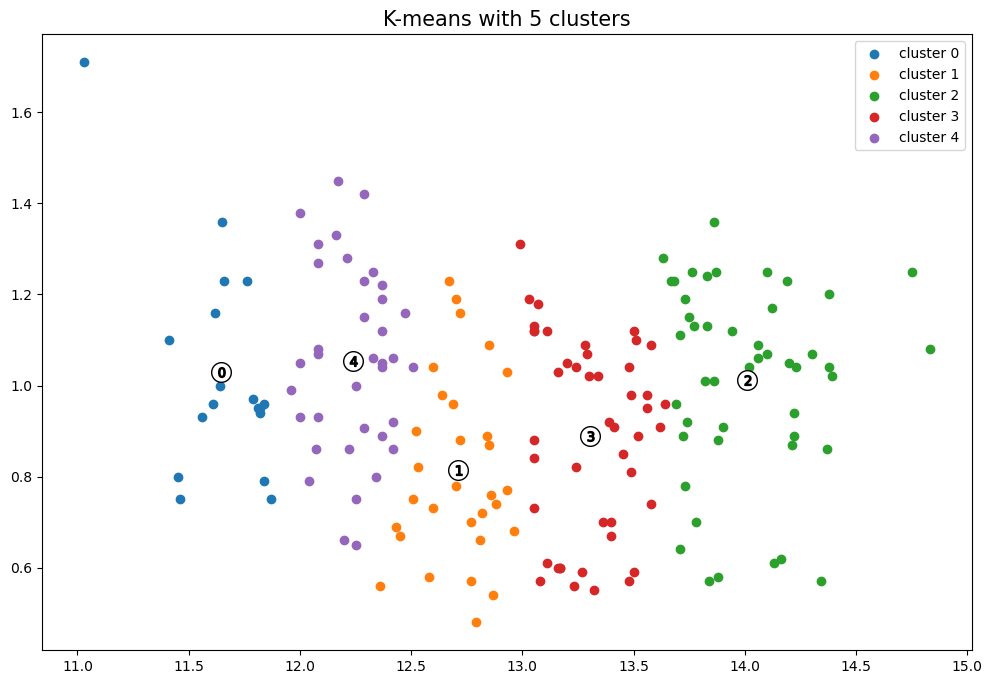

array([2., 3., 3., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 3., 2., 1., 2., 1., 3., 3., 3., 3., 2., 2., 2., 3., 2., 2.,
       3., 3., 3., 3., 3., 2., 3., 3., 2., 3., 3., 2., 2., 2., 2., 2., 3.,
       2., 2., 2., 2., 3., 2., 3., 2., 4., 4., 1., 2., 4., 4., 4., 3., 4.,
       3., 4., 4., 2., 3., 3., 4., 0., 3., 0., 4., 1., 4., 1., 4., 3., 0.,
       1., 4., 0., 0., 4., 4., 4., 1., 4., 0., 4., 0., 4., 4., 4., 4., 1.,
       4., 0., 4., 4., 4., 1., 4., 0., 0., 1., 0., 0., 4., 0., 0., 4., 1.,
       4., 0., 0., 4., 3., 0., 4., 1., 0., 4., 4., 1., 1., 1., 1., 1., 1.,
       4., 1., 3., 1., 1., 3., 3., 3., 4., 3., 2., 1., 3., 3., 3., 1., 3.,
       3., 1., 3., 2., 1., 2., 3., 1., 2., 1., 1., 2., 2., 3., 1., 3., 3.,
       4., 1., 2., 2., 3., 3., 3., 2.])

In [14]:
kmeans_5 = KMeans(K=5, max_iters=150, plot_steps=True)
kmeans_5.predict(X)

# Problem 3: Elbow Curve Method

####  Draw Elbow for the whole Wine Dataset (All features)

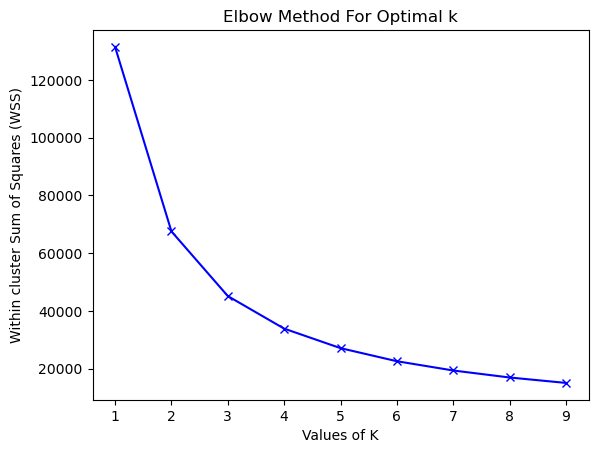

In [15]:
WSS = []
K = range(1,10)
for num_cluster in K:
    kmeans = KMeans(K = num_cluster,max_iters=200,plot_steps= False)
    kmeans.predict(wine.values)
    WSS.append(kmeans._within_cluster_sum_of_squares())

plt.plot(K, WSS, 'bx-')
plt.xlabel("Values of K")
plt.ylabel('Within cluster Sum of Squares (WSS)')
plt.title("Elbow Method For Optimal k")
plt.show()

# Problem 4: Limitation of K-Means

- Read the limitation of k-means (https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages), find at least three examples that k-means doesn't work.

**1. Data with non-spherical clusters:**
- k-means relies on the Euclidean distance between data points to assign them to clusters. This works well when the clusters are roughly spherical in shape. However, if the clusters are elongated, crescent-shaped, or have other irregular shapes, k-means will struggle to capture their true structure.

- Example: Imagine trying to cluster customers based on their purchase history. If one cluster represents frequent buyers of high-end electronics, another represents occasional buyers of groceries, and a third represents budget-conscious buyers of various items, k-means might mistakenly group the electronics and grocery buyers together due to their higher overall spending, even though their buying habits are quite different.

**2. Data with varying densities:**

- k-means assumes that the clusters have roughly the same density, meaning they contain a similar number of data points. If some clusters are much denser than others, k-means will tend to favor the denser clusters, potentially neglecting or even merging the sparser ones.

- Example: Clustering images in a dataset containing many pictures of cats and a few pictures of dogs. The large number of cat images would dominate the clustering process, potentially leading to all images being grouped together as "cats" because of their similar visual features, even though the "dogs" cluster is distinct but much smaller.

**3. Data with high dimensionality:**

- As the number of features in your data increases (high dimensionality), the concept of distance between data points becomes less meaningful. k-means relies on Euclidean distance, which can become unreliable in high-dimensional spaces, leading to inaccurate clustering results.

- Example: Analyzing gene expression data, where each gene represents a feature and there can be thousands of genes per sample. The vast number of dimensions can make it difficult for k-means to identify meaningful relationships between genes and group them into relevant clusters.

# Problem 5: K-Means++ Algorithm 

<!-- https://www.aiacceleratorinstitute.com/mastering-data-clustering-your-comprehensive-guide-to-k-means-and-k-means/#:~:text=K%2Dmeans%2B%2B%20is%20an,together%20based%20on%20their%20similarity. -->